In [1]:
%pylab
import importlib.util
import sys
sys.path.append('/Users/collinshuff/Documents/UVa-Fall18/CS4457/Networks-Final/radio/')
from receive import *
from decode import *
import config
import scipy.fftpack
import matplotlib.pyplot as plt
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [3]:
frequency = config.frequency
offset = config.offset
samp_rate = config.rec_samp_rate
baud = config.baud
samp_per_bit = samp_rate/baud
n_bits = 44

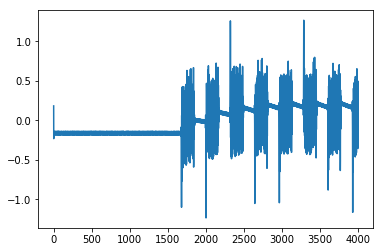

In [41]:
time = 1542752820
end = time
path = '/Users/collinshuff/Documents/UVa-Fall18/CS4457/Networks-Final/radio/samples'
samples = np.load(f'{path}/{time}.npy')
time += 1
while time <= end: 
    samples = np.concatenate([samples, np.load(f'{path}/{time}.npy')])
    time += 1

fm_demodulated_wave, new_samp_rate = fm_demodulate(samples, frequency, offset, samp_rate)
plt.plot(fm_demodulated_wave[:4000])

True


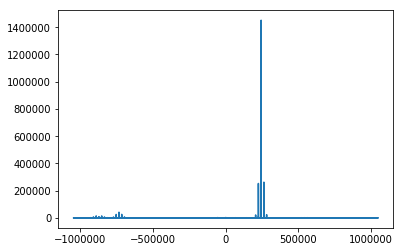

In [12]:
samples = samples[:samp_rate]
fft = scipy.fftpack.fft(samples)
freqs = scipy.fftpack.fftfreq(len(samples)) * samp_rate
plt.plot(freqs, np.abs(fft))
print(detect_transmitter_on(samples, samp_rate, offset))

avg: 0.22892666826371927
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]
44


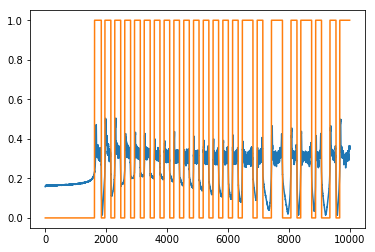

In [41]:
wave, new_samp_rate = fm_demodulate(samples, frequency, offset, samp_rate)
smoothed_wave = smooth(np.abs(wave), window_len=21, window='flat')
envelope = get_envelope(smoothed_wave)[10:-10]
square_wave = binary_slicer(envelope)
plt.plot(envelope[:10000])
plt.plot(square_wave[:10000])
rec_bits = decode_manchester(square_wave, samp_per_bit, threshold=samp_per_bit/.5099)
print(rec_bits)
print(len(rec_bits))